# Part I - Fordgobike tripdata Exploration.
## by Beryl Chebet

## Introduction
> This project explores the dataset containing information about individual rides made in a bike-sharing system in the greater San Fransisco Bay Area. This project is also the 3rd project for the Udacity Nanodegree program, which uses Python Visualization libraries to explore relationships between different variables, 

> The Fordgobike sharing system begun as as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.On June 28, 2018, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

### Structure of the dataset.
The dataset has 16 columns and 183412 rows, which contains the following variables:
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - Bike ID
 - User Type (Subscriber or Customer)
 - End Station Longitude
 - End Station Latitude
 - Bike share for all trip
 - Member birth year
 - Member gender
 - Duration in seconds.

## Gathering the data


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
data=pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessing the data.

In [5]:
# checking the shape and datatypes of values in columns.
print(data.shape)
print(data.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [6]:
#changing the member gender to category and checking sum of duplicated rows.
data['member_gender']=data['member_gender'].astype('category')
sum(data.duplicated())

0

In [7]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Data Quality issues
The following data quality issues were noted from the analysis:

- Start_station id, start station name,end station id,end station name, member birth year,member gender contain null values.
- Start time, end time should be datetime data type instead of string.
- Start_station id , end_station id ,bike id should be strings instead of intergers
- Member gender na user type should be categorical datatypes.

### Preliminary data wrangling steps
> In this section , I clean the data to try and make easier for visualization .I'll first make a copy of the  data set the use the  define,code,test steps. I'll first create a copy of the data to perform cleaning steps on.

In [8]:

data2=data.copy()
data2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Start_station id, start station name,end station id,end station name, member birth year,member gender contain null values.

In [9]:
#Define:drop rows with missing values using .dropna()
#Code
data2.dropna(inplace=True)

In [10]:
#test
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
dtypes: category(1), float64(7), int64(2), object(6)
memory usage: 21.5+ MB


#### Start time, end time should be datetime data type instead of string.

In [11]:
#Define: Change the starttime and endtime to_datetime object using dt_datetime
#Code
data2[['start_time','end_time']]=data2[['start_time','end_time']].apply(pd.to_datetime)
#Test
print(data2.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object


#### Start_station id , end_station id ,bike id should be strings instead of intergers, member_birth year should be an integer,

In [12]:
#Define:convert endstation id ,startstationid,bikeid to string using .astype,convert member_birth_year to integer using .astype
#Code
convert={'start_station_id':str,
         "end_station_id":str,
         'bike_id':str,
        'member_birth_year':int}
data2=data2.astype(convert)
#Test
print(data2.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip            object
dtype: object


#### Creating start day, start month ,end day, end month ,start hour and end hour from the start time and end time column in the dataset.

In [13]:
#Define:Extracting the day,month, hour,year from the startitme and endtime.
#Code
data2['start_day']=data2['start_time'].dt.day_name()
data2['start_month']=data2['start_time'].dt.month_name()
data2['end_day']=data2['end_time'].dt.day_name()
data2['end_month']=data2["end_time"].dt.month_name()
data2['start_year']=data2['start_time'].dt.year
data2['start_hour']=data2['start_time'].dt.hour
data2['end_hour']=data2['end_time'].dt.hour

In [14]:
#Test
data2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month,start_year,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,Thursday,February,Friday,March,2019,17,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,Thursday,February,Friday,March,2019,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,Thursday,February,Friday,March,2019,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,Thursday,February,Friday,March,2019,23,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,Thursday,February,Friday,March,2019,23,0


> All the bike rides started in the month of February , therefore will not provide much information for the question which month had the highest bike rides,

In [15]:
#droping end time,startstation latitude,startstation longitude,startstation id,end station id,end station latitude and end station longitude.
data2.drop(["end_time",'start_station_latitude','start_station_longitude','start_station_id','end_station_id','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

In [16]:
data2.head()
print(data2.shape)

(174952, 16)


#### Creating an age column from the year column.

In [17]:
#Define Subtract member birth year from start year
#Code
data2['age']=data2.member_birth_year.apply(lambda x:2019 -x)
#Test
data2.head()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month,start_year,start_hour,end_hour,age
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,February,Friday,March,2019,17,8,35
2,61854,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,February,Friday,March,2019,12,5,47
3,36490,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,February,Friday,March,2019,17,4,30
4,1585,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,February,Friday,March,2019,23,0,45
5,1793,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thursday,February,Friday,March,2019,23,0,60


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_month                174952 non-null object
end_day                    174952 non-null object
end_month                  174952 non-null object
start_year                 174952 non-null int64
start_hour                 174952 non-null int64
end_hour                   174952 non-null int64
age                        174952 non-null int64
dtypes: category(1), datetime64[ns]

#### Converting the bike duration from seconds to minutes.

In [19]:
#Define: divide duration in sec by 60
#Code
data2['duration_sec']=data2['duration_sec']/60
data2.head()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month,start_year,start_hour,end_hour,age
0,869.750000,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,February,Friday,March,2019,17,8,35
2,1030.900000,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,February,Friday,March,2019,12,5,47
3,608.166667,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,February,Friday,March,2019,17,4,30
4,26.416667,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,February,Friday,March,2019,23,0,45
5,29.883333,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thursday,February,Friday,March,2019,23,0,60


In [20]:
# limiting the duration in minutes to 2 decimal places.
data2['duration_sec']=data2['duration_sec'].round(decimals=2)
data2.rename(columns={'duration_sec':'duration_min'},inplace= True)
data2.head()

,duration_min,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month,start_year,start_hour,end_hour,age
0,869.75,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,February,Friday,March,2019,17,8,35
2,1030.90,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,February,Friday,March,2019,12,5,47
3,608.17,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,February,Friday,March,2019,17,4,30
4,26.42,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,February,Friday,March,2019,23,0,45
5,29.88,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thursday,February,Friday,March,2019,23,0,60


### What is the structure of your dataset?

> The dataset has 16 columns and 174952 rows. The following columns are in the dataset:
 
 - Duration in minutes.
 - Start station name
 - End station name
 - User type
 - Member Gender
 - Member birth year
 - Bike share for all trip
 - Start day
 - Start Month
 - End day
 - End Month
 - Start Year.
 - Start Hour
 - End hour 
 - Age

> User type,member grade and bike share for all trip are nominal data types , with  user type containing the customer and subscriber values , and member gender  containing male, female and other values.

 

### What is/are the main feature(s) of interest in your dataset?

> My  interest is in figuring how age,gender,days and hours,user types affect the number of bike rides, When are the most trips taken in terms of the time of day, day of the week,which gender had the most bike trips, Does user type affect the number of bike rides ,does the end station affect  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the subscribers will have more bikerides compared to customer usertype, and that younger people will have more bikerides compared to older people. The main feature that will aid in this investiagtion are age,gender,usertypes,days and hours.

## Univariate Exploration

> In this section,I'll investigate distributions of individual variables in preparation to look at the relationships between variables. The following questions will guide the univariate exploration:


- Days of the week with the highest and least start bike rides
- Age distribution of riders
- Gender of the riders,
- User type distribution of the bike riders
- Which start hour has the highest number of bike rides
- How duration is distributed among the bike rides,

### Which day of the week has the highest start bike rides

In [21]:
# creating a function for the title and color.
def x_y_t(xlabel,ylabel,title):
    plt.title(title,fontsize=13)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
color=sb.color_palette()[2]

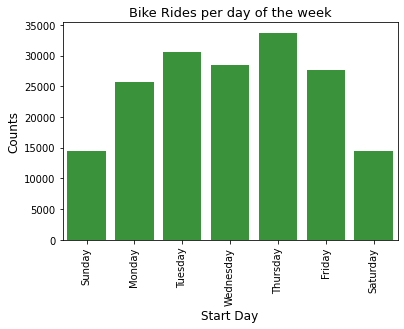

In [22]:
###Which day of the week has the highest start bike rides
days_order= CategoricalDtype(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered= True)
data2['start_day']=data2['start_day'].astype(days_order)
sb.countplot(data=data2,x='start_day',color=color)
plt.xticks(rotation=90)
x_y_t('Start Day',"Counts","Bike Rides per day of the week")

Thursdays and Tuesdays had the highest bikerides, while Saturdays and Sundays had the least bike rides.

### What is the age distribution of the bike riders

In [23]:
### What is the age distribution of the bike riders
data2.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

The minimum age is 18 and the maximum age is 141, we can categorize the ages into groups of 10s,20s,30s,40s, 50s and the ages above 100 to be in the 100s category.

In [24]:
#defining a range for the age groups,
bins=list(range(10,110,10))
bins.append(data2.age.max())
#creating labes for bins.
labels=[f"{str(group)}s" for group in bins[:-1]]
bins,labels

([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 141],
 ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s'])

In [25]:
#cuting the age into categories as per the bins.
data2['age_category']=pd.cut(data2['age'],bins=bins,labels=labels)
data2.age_category.value_counts()

20s     70054
30s     63808
40s     22024
50s     11323
10s      4213
60s      2955
70s       383
80s       115
100s       72
90s         5
Name: age_category, dtype: int64

In [1]:
!pip install seaborn --upgrade
import seaborn as sb
sb.__version__

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


'0.11.2'

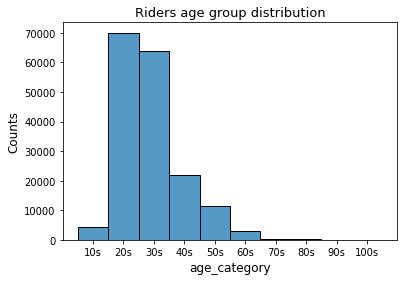

In [26]:
#creating a histogram plot of the ages category
sb.histplot(data=data2.age_category);
x_y_t('age_category',"Counts","Riders age group distribution")

Majority of the riders are in their  20s and 30s years of age

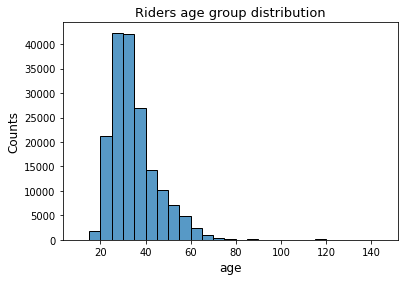

In [27]:
#creating a histogram of the ages
sb.histplot(data=data2.age,bins=range(10,data2.age.max()+5,5));
x_y_t('age',"Counts","Riders age group distribution")

The age distribution is highly skewed to the right, with few bikers in the ages of 80 and above.


### Which gender has the most bike riders?

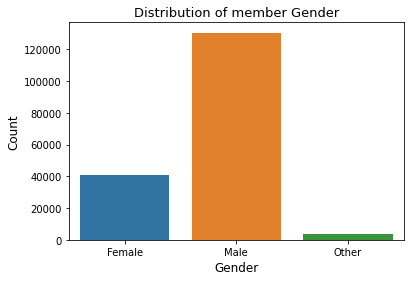

In [28]:
sb.countplot(data=data2,x='member_gender')
x_y_t('Gender','Count','Distribution of member Gender')

Males use the bikeriding service than females. 

### Which user type has more bike rides?

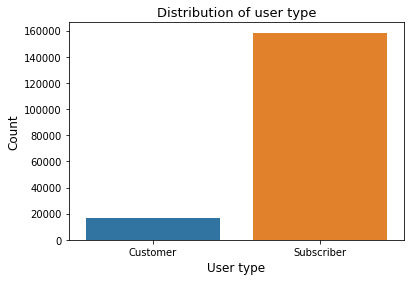

In [29]:
sb.countplot(data=data2,x='user_type')
x_y_t('User type','Count','Distribution of user type')

### Which user type had the most bike rides

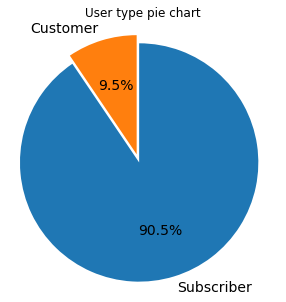

In [30]:

plt.figure(figsize=(12,5))
user_cat=data2['user_type'].value_counts()
plt.pie(user_cat,labels=user_cat.index,startangle=90,counterclock=False,explode=(0,0.1),autopct='%1.1f%%',radius=1.4,textprops={'fontsize': 14})
plt.axis('square')
plt.title('User type pie chart')
plt.show()

Majority of the bikeriders are subscribers  with a very small percentage being the customers.

### What is the hourly distribution of the start rides and end rides?

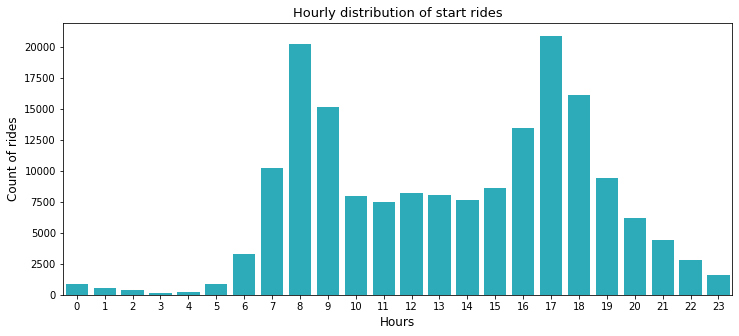

In [31]:

plt.figure(figsize=(12,5))
base_color=sb.color_palette()[9]
sb.countplot(data=data2,x='start_hour',color=base_color);
x_y_t('Hours','Count of rides','Hourly distribution of start rides')


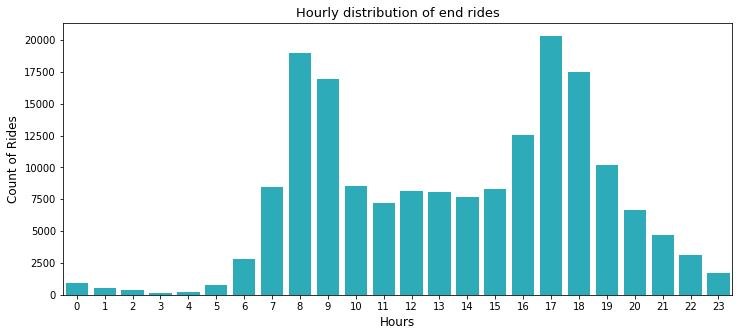

In [32]:
plt.figure(figsize=(12,5))
sb.countplot(data=data2,x='end_hour',color=base_color);
x_y_t('Hours','Count of Rides','Hourly distribution of end rides')


 The highest start rides occur at 8 and 9 am in the morning,5pm and 6pm in the evening, this is mostly the time when people are going to work and leaving their workstations respectively.This trend is also observed in the end rides.

### What is the weekly  distribution of bikerides?

In [33]:
### What is the weekly  distribution of bikerides
week=data2.set_index('start_time',inplace=False)
week.head(2)

,duration_min,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month,start_year,start_hour,end_hour,age,age_category
start_time,,,,,,,,,,,,,,,,,
2019-02-28 17:32:10.145,869.75,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,February,Friday,March,2019,17,8,35,30s
2019-02-28 12:13:13.218,1030.90,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,February,Friday,March,2019,12,5,47,40s


In [35]:
weekly=week.resample('W-SAT').count()
weekly.head(2)

,duration_min,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month,start_year,start_hour,end_hour,age,age_category
start_time,,,,,,,,,,,,,,,,,
2019-02-02,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830,8830
2019-02-09,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214,42214


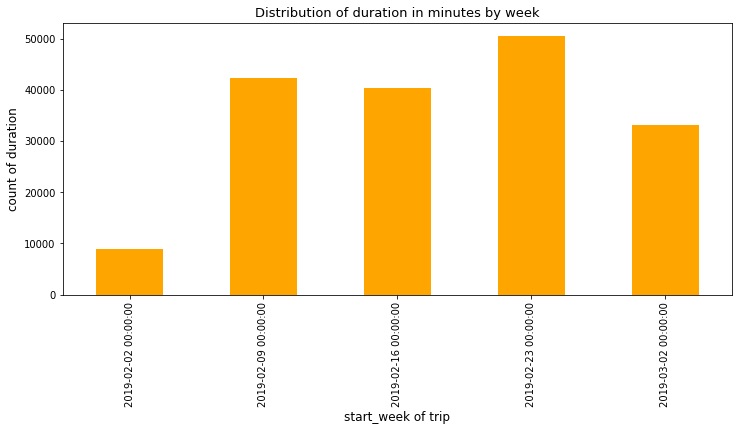

In [36]:
plt.figure(figsize=(12,5))
weekly.duration_min.plot(kind='bar', color='orange')
x_y_t('start_week of trip','count of duration','Distribution of duration in minutes by week')

 The week of 2019-02-23 has the highest bike rides during that month, while the week of 2019-02-02 has the least rides.

### What is the duration distribution of bike rides ?

In [38]:

print(data2.duration_min.mode())
print(data2.duration_min.describe())

0    4.53
dtype: float64
count    174952.000000
mean         11.733373
std          27.370085
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: duration_min, dtype: float64


The minimum duration for bike rides is 1 minute ,the mean bike ride is 11 minutes, while the maximum bike ride is 1409 minutes which is a days ride.


In [37]:
print('Bikes with a duration greater that 200 mins are', data2.query('duration_min >= 200').shape[0] / data2.shape[0], 'of the rides:')
print('Bikes with a duration less than 200 mins are', data2.query('duration_min <= 200').shape[0] / data2.shape[0], 'of the rides:')

Bikes with a duration greater that 200 mins are 0.0017033243403905072 of the rides:
Bikes with a duration less than 200 mins are 0.9982966756596094 of the rides:


In [39]:
#checking sum of rows with a duration greater than 200mins
high_outliers = ((data2['duration_min'] > 200))
print(high_outliers.sum())

298


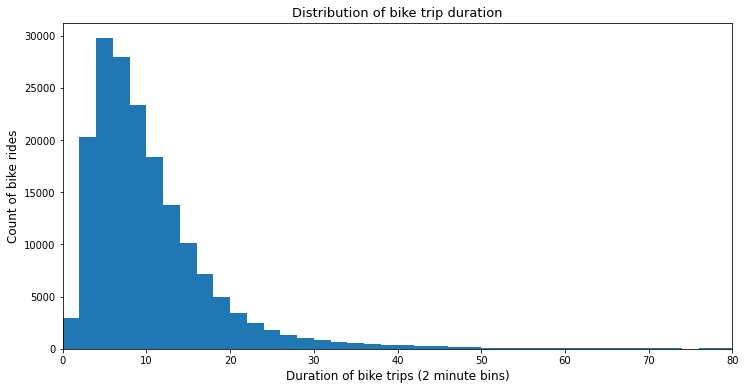

In [40]:
#creating a histogram with duration less that 80mins.
duration_filter=data2.query('duration_min<80')
bins = np.arange(0, duration_filter.duration_min.max(0)+1, 2)
plt.figure(figsize=(12,6))
plt.hist(data=duration_filter, x='duration_min', bins=bins)
plt.xlim((0,80))

x_y_t('Duration of bike trips (2 minute bins)','Count of bike rides', 'Distribution of bike trip duration')


Duration is highly skewed to the right, with fewer rides taking more than 50 minutes.

### Which is the top end destination for bike rides

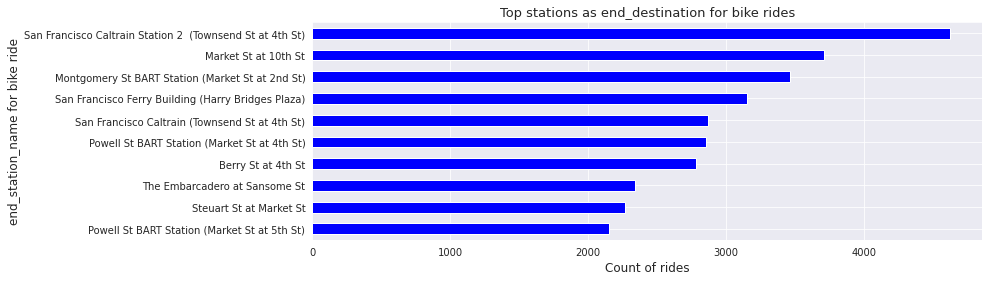

In [41]:

top_dest = data2['end_station_name'].value_counts().index[:10]
top_dest_df = data2.loc[data2['end_station_name'].isin(top_dest)]
plt.figure(figsize=(12,4))
sb.set_style('darkgrid')
top_dest_df['end_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh', color='blue');
x_y_t('Count of rides','end_station_name for bike ride','Top stations as end_destination for bike rides')

 San Franisco Caltrain Station 2,Market Street at 10th Street, Montgomery st Bart Station ,San Francisco Berry Building,San Fransisco Caltrain and Powell St Bart Station are the top 5 end destinations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 - The number of trips taken on Thursday is double that taken on Saturdays or Sundays.
 - The highest start rides occur at 8 and 9 am in the morning,5pm and 6pm in the evening
 - Duration of bike rides is mostly less than 80 minutes and is highly skewed to the right.
 - Subscribers have more bike rides compared to customers, as earlier anticipted
 - Majority of the riders are in their 20s and 30s years of age,I had to create bins(10,20,30 etc)for the ages inorder to get      more information on the ages.
 - The week of 2019-02-23 has the highest bike rides during that month, while the week of 2019-02-02 has the least rides.
 - San Franisco Caltrain Station 2,Market Street at 10th Street, Montgomery st Bart Station ,San Francisco Berry Building,San Fransisco Caltrain and Powell St Bart Station are the top 5 end destinations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 - converted several variables to a correct datatype (start_time, end_time, start_station_id, user_type). And created several additional variables (age,year,start_hour, start_day, start_month, start_week) to be able to create plots with different time resolutions.
 - Plotted durations less than 200 minutes, because a small percentage of the dataset(0.017),had values greater than 200 minutes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).
- relationship btw user type and duration(quantitative and qualitative data)
- Relationship btw user type and days of the week(Qualitative and qualitative)
- Relationship btw user type and start hour(Qualitative and quantitative)
- Relationship btw gender and user type(Qualitative vs qualitative)
- Relationship btw duration and end station(Quantitative vs qualitative)
- Relationship between gender and age distribution.
- Relationship btw start hour and duration.

### Relationship between user type and duration

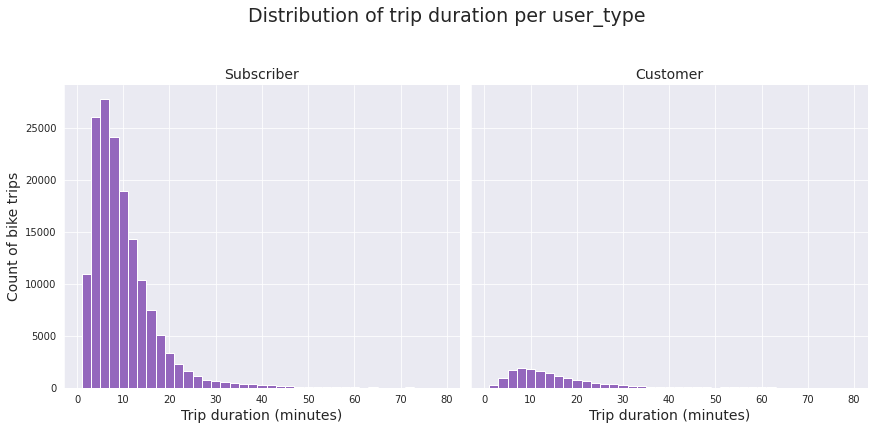

In [42]:
g = sb.FacetGrid(data = duration_filter, col = 'user_type', col_wrap = 2, height = 6)
base_color = sb.color_palette()[4]

g.map(plt.hist, 'duration_min', bins = np.arange(duration_filter['duration_min'].min(), duration_filter['duration_min'].max()+1, 2), color = base_color)
g.set_ylabels('Count of bike trips', size=14)
g.set_xlabels('Trip duration (minutes)', size=14)
g.set_titles('{col_name}', size=14);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of trip duration per user_type', fontsize=19);


Customers take fewer  trip compared to subscribers,

Subscribers and customers histobrams are both right skewed

Subscribers generally take shorter trips, which majority of the rides lasting for 4 minutes and 6 minutes,

### Relationship between user type and duration using a violin plot and boxplot

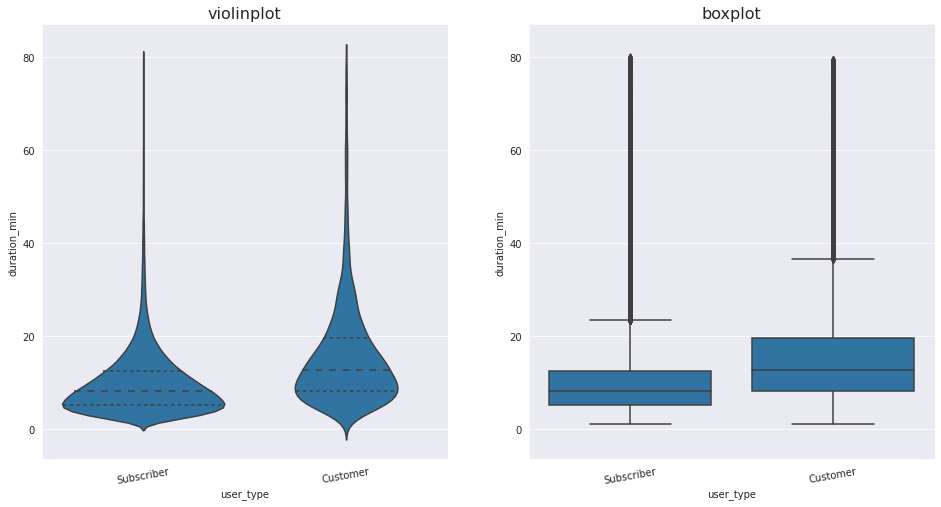

In [43]:
plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[0]

#  violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = duration_filter, x = 'user_type', y = 'duration_min', inner='quartile', color = base_color)       
            # inner = 'quartile' means three lines will be plotted within each violin area for the three middle quartiles. 
            #  thick dashes indicates the median, and the two shorter dashes are first and third quartiles.
plt.xticks(rotation = 10)     
plt.title('violinplot', fontsize=16)

#  boxplot
plt.subplot(1, 2, 2)
sb.boxplot(data = duration_filter, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())              # set y-axis limits to be same as left plot
plt.title('boxplot', fontsize=16);

The median duration for the customer is higher than that of the subscriber, 

The subscriber violin plot has most rides at the 1st quartile range, 

The 3rd quartile of customers(20)is  higher than that of the subscriber.


### Relationship btw user type and days of the week

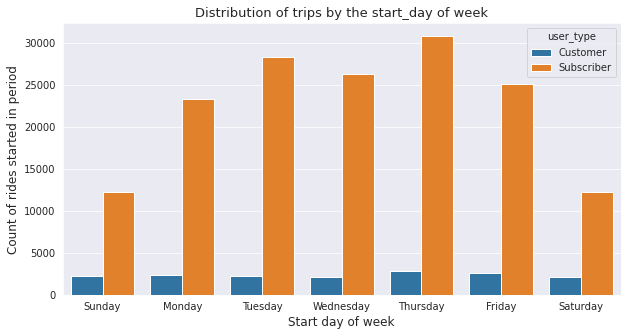

In [45]:
plt.figure(figsize = [10, 5])
sb.countplot(data=data2, x='start_day', hue='user_type')
x_y_t('Start day of week','Count of rides started in period','Distribution of trips by the start_day of week');

 Subscribers ride mostly during the weekdays with the lowest rides being during the weekends.
 
 Customers rides are relatively low, with  Thursday and Friday having the highest rides.

### Relationship btw user type and start hour

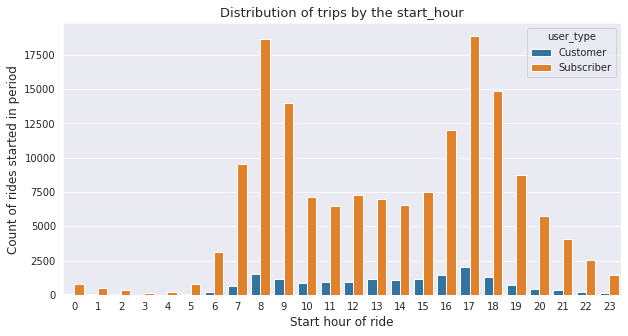

In [46]:
plt.figure(figsize = [10, 5])
sb.countplot(data=data2, x='start_hour', hue='user_type')
x_y_t('Start hour of ride',"Count of rides started in period","Distribution of trips by the start_hour")

Customers start rides betweern 8am and 5 pm, wwith the highest  rides at 5 pm,

Start rides for customers is relatively steady between 8 to 5pm, unlike subscribers who have major peaks at 8 ,9 am and 5 and 6pm

Majority of subscriber rides take place between 8 and 9  and 17 and 18hrs.

### Relationship btw gender and user type(Qualitative vs qualitative)

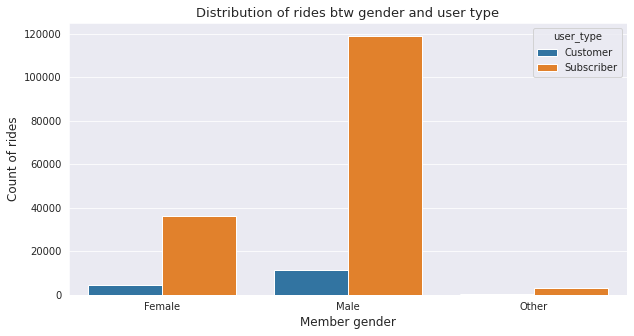

In [47]:
plt.figure(figsize = [10, 5])
sb.countplot(data=data2, x='member_gender', hue='user_type')
x_y_t('Member gender',"Count of rides",'Distribution of rides btw gender and user type')

Majority of female and male genders are subscribers.

Number of male customers is higher than that of female customers.

### Relationship btw duration and end station(Quantitative vs qualitative)

In [48]:
make_means = data2.groupby('end_station_name').count()
comb_order = make_means.sort_values('duration_min', ascending = False).index[:5]

In [49]:
comb_order

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)'],
      dtype='object', name='end_station_name')

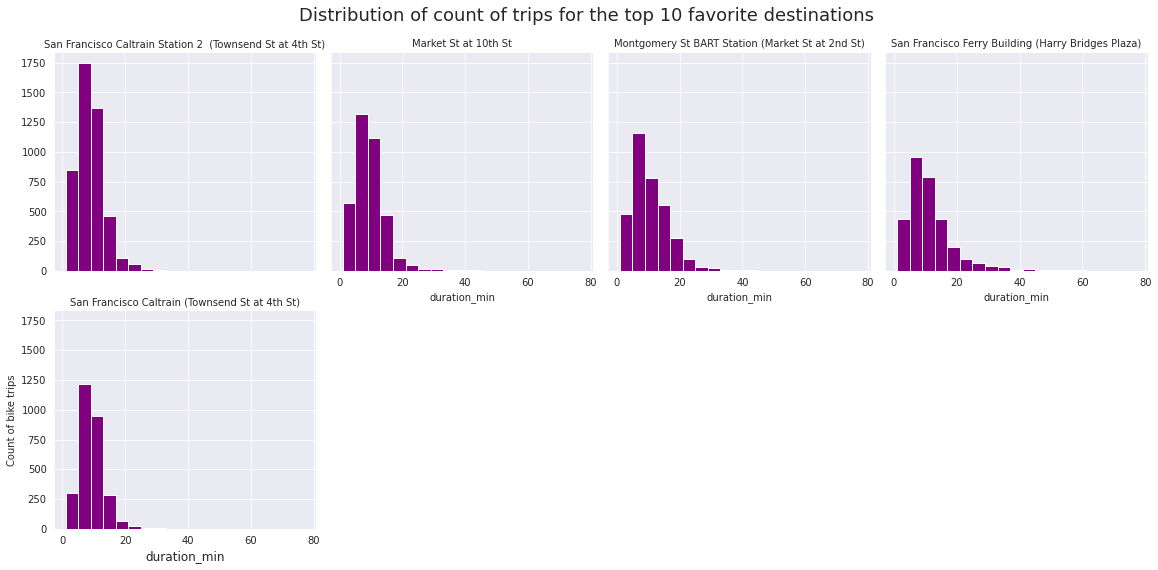

In [50]:
g = sb.FacetGrid(data = top_dest_df, col = 'end_station_name', col_wrap = 4, height = 4, col_order = comb_order, sharey=True)
bins = np.arange(duration_filter['duration_min'].min(), duration_filter['duration_min'].max()+1,4)

g.map(plt.hist, 'duration_min', bins =bins, color='purple')
plt.ylabel('Count of bike trips')
plt.xlabel('duration_min', fontsize=12)
g.set_titles('{col_name}');

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of count of trips for the top 10 favorite destinations', fontsize=18);

In [ ]:
 - San Fransisco Caltrain(Townsend street at 4th street) has relatively short trip durations with the last trip duration being 24mins
 - San Francisco Ferry Building (Harry Bridges Plaza) is skewed to the right, meaning longer trips durations are fewer in frequency compared to the shorter trip durations.b 

###  Relationship between gender and age distribution.

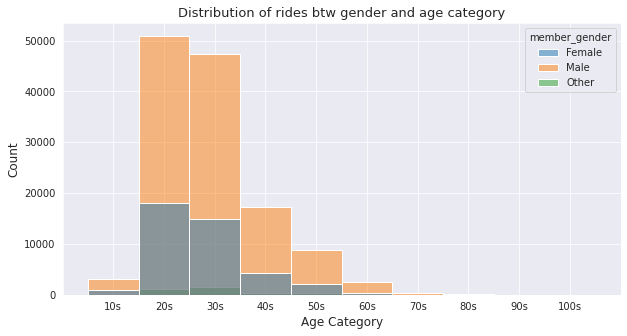

In [51]:
plt.figure(figsize = [10, 5])
sb.histplot(data=data2, x='age_category', hue='member_gender')
x_y_t('Age Category','Count','Distribution of rides btw gender and age category')

- Majority of both male and female bikers are in their 20s and 30s,
- There are more male bike riders than female riders across all ages.
- There are significantly fewer females than males as we get to the ages of 50s and above

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers generally take shorter trips, which majority of the rides lasting for 4 minutes and 6 minutes,

> Subscribers ride mostly during the weekdays with the lowest rides being during the weekends.

> Majority of female and male genders are subscribers.

> Number of male customers is higher than that of female customers.

> The median duration for the customer is higher than that of the subscriber,

> Start rides for customers is relatively steady between 8 to 5pm, unlike subscribers who have major peaks at 8 ,9 am and 5 and 6pm

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  San Fransisco Caltrain(Townsend street at 4th street) has relatively short trip durations compared to the top 5 destinations   with the last trip duration being 24mins

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.
- user_type, start_day_of_week and trip duration in minutes
- user_type,duration and start hour of day
- how the hourly usage varies during a week for Customers and Subscribers

### user_type, start_day_of_week and trip duration in minutes

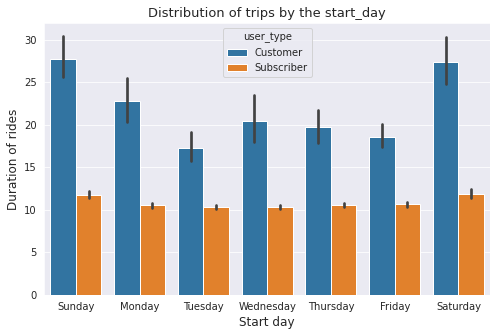

In [52]:
plt.figure(figsize=(8,5))
sb.barplot(data=data2, x='start_day', y='duration_min', hue='user_type')
x_y_t('Start day','Duration of rides','Distribution of trips by the start_day')



Duration of Trips on Weekends take longer than those during weekdays for Customers,with the highest duration being on a Sunday 27.78 minutes.

Subscribers take  shorter trips compared to Customers



In [53]:
data2.groupby(['start_day','user_type'])['duration_min'].mean()

start_day  user_type 
Sunday     Customer      27.783858
           Subscriber    11.775097
Monday     Customer      22.769641
           Subscriber    10.512422
Tuesday    Customer      17.235869
           Subscriber    10.371641
Wednesday  Customer      20.480796
           Subscriber    10.332137
Thursday   Customer      19.697029
           Subscriber    10.524482
Friday     Customer      18.571224
           Subscriber    10.624596
Saturday   Customer      27.377176
           Subscriber    11.819642
Name: duration_min, dtype: float64

### user_type,duration and start hour of day

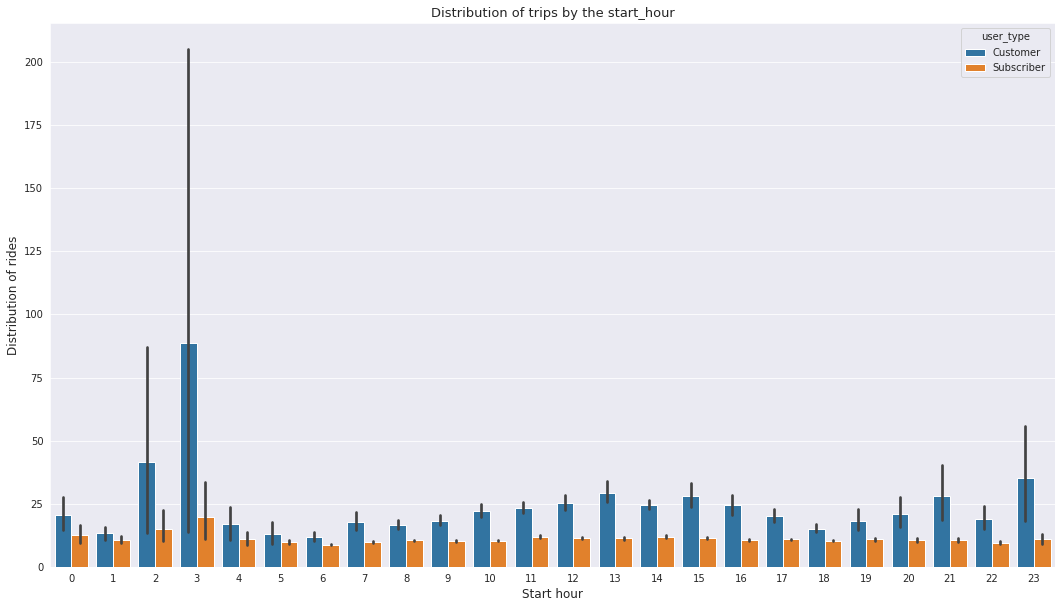

In [54]:
plt.figure(figsize=(18,10))
sb.barplot(data=data2, x='start_hour', y='duration_min', hue='user_type')
x_y_t('Start hour','Distribution of rides','Distribution of trips by the start_hour')

Customer Trips starting at 3am have longer durations than all other start hours,

Subscriber trip durations tend to be less than customer trip across all start hours.


### How the hourly usage varies during a week for Customers and Subscribers

In [56]:

cust = data2.query('user_type == "Customer"')#creating a new dataframe where user type is customer
ct_counts = cust.groupby(['start_day', 'start_hour']).size() #groups by start day and starthour returns number of rows and columns
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')#creating a pivot table with specified index,columns and index values
ct_counts


start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_day,,,,,,,,,,,,,,,,,,,,,
Sunday,17.0,17.0,16.0,3.0,3.0,4.0,1.0,25.0,37.0,75.0,...,265.0,259.0,251.0,189.0,105.0,65.0,67.0,40.0,27.0,20.0
Monday,11.0,1.0,1.0,NaN,3.0,6.0,37.0,107.0,229.0,169.0,...,130.0,143.0,224.0,311.0,171.0,93.0,65.0,46.0,26.0,8.0
Tuesday,3.0,2.0,1.0,NaN,1.0,10.0,30.0,123.0,309.0,196.0,...,111.0,123.0,170.0,315.0,231.0,115.0,58.0,47.0,27.0,12.0
Wednesday,8.0,2.0,NaN,1.0,1.0,6.0,34.0,96.0,252.0,160.0,...,90.0,117.0,168.0,318.0,217.0,103.0,78.0,53.0,34.0,26.0
Thursday,14.0,4.0,3.0,2.0,2.0,18.0,41.0,148.0,308.0,239.0,...,125.0,144.0,237.0,454.0,324.0,167.0,90.0,58.0,43.0,31.0
Friday,13.0,2.0,8.0,1.0,2.0,13.0,29.0,136.0,343.0,264.0,...,123.0,167.0,228.0,287.0,146.0,69.0,52.0,56.0,47.0,25.0
Saturday,25.0,16.0,8.0,4.0,5.0,10.0,2.0,17.0,55.0,82.0,...,259.0,222.0,186.0,145.0,81.0,70.0,40.0,39.0,22.0,33.0


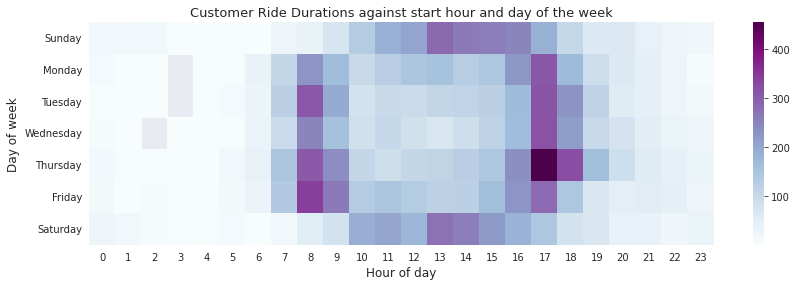

In [57]:
plt.figure(figsize=(14,9))
plt.subplot(2, 1, 1)
sb.heatmap(ct_counts, cmap="BuPu");
x_y_t('Hour of day','Day of week','Customer Ride Durations against start hour and day of the week')


In [ ]:
Customers have greater numbe rides on Thursdays, at 5pm,6pm and on Mondays to Friday at 5pm
Over the wwekends on Saturday and Sunday most of the rides start between 1 pm and 4pm for the customer,



In [58]:
sub = data2.query('user_type == "Subscriber"')
st_counts = sub.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')
st_counts

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_day,,,,,,,,,,,,,,,,,,,,,
Sunday,137,81,72,33,19,26,50,137,289,519,...,1101,1067,1124,978,824,691,491,415,252,133
Monday,86,43,39,20,37,124,556,1545,2963,2058,...,782,1043,1777,2993,2191,1331,861,561,346,172
Tuesday,77,51,31,17,30,169,656,2061,3927,3041,...,966,1070,2018,3655,2915,1543,1044,622,325,164
Wednesday,75,43,29,14,25,152,530,1707,3328,2411,...,857,981,1958,3499,2834,1680,1069,815,473,214
Thursday,109,41,26,19,40,165,661,2120,4166,2568,...,1008,1241,2356,4064,3298,1798,1282,819,489,277
Friday,131,77,55,28,40,138,578,1821,3579,2724,...,786,1089,1861,2766,2071,1107,621,466,430,256
Saturday,187,145,66,22,19,25,88,188,442,698,...,1074,980,915,930,710,592,393,363,252,201


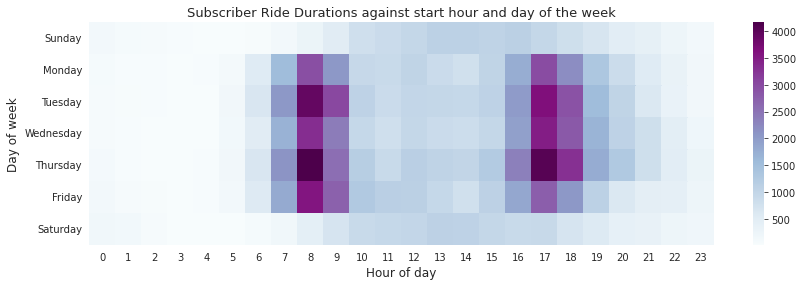

In [59]:
plt.figure(figsize=(14,9))
plt.subplot(2, 1, 2)
sb.heatmap(st_counts, cmap="BuPu");
#plt.title('subscriber', loc='right', fontsize=14);
#plt.xlabel('Hour of day', fontsize=14);
#plt.ylabel('Day of week', fontsize=14);
x_y_t('Hour of day','Day of week','Subscriber Ride Durations against start hour and day of the week')

Majority of subscriber rides take place between 8 and 9  and 17 and 18hrs during the weekdays, 

Subscribers take significantly fewer rides during the weekends than during weekdays.

In [60]:
print(data2.columns)

Index(['duration_min', 'start_time', 'start_station_name', 'end_station_name',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'start_day', 'start_month', 'end_day',
       'end_month', 'start_year', 'start_hour', 'end_hour', 'age',
       'age_category'],
      dtype='object')


In [61]:
data2.to_csv('ford_clean')

## Conclusions
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


- Majority of subscriber rides take place between 8 and 9  and 17 and 18hrs during the weekdays,
- Customers take  longer trips compared to Subscribers.
- Duration of Trips on Weekends take longer than those during weekdays for Customers,highest duration being on a Sunday 27.78 minutes.
- Subscribers ride mostly during the weekdays with the lowest rides being during the weekends.

### Were there any interesting or surprising interactions between features?

- There hours of start rides vary according to the user type, 
- Customers have greater number of  rides on Thursdays,starting at 5pm,6pm and on Fridays, Thursday and Tuesday at 8am and Over the weekends on Saturday and Sunday most of the rides start between 1 pm and 4pm for the customer,